# Setup

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../..'))) # access sibling directories

from src.python.metrics import performance_metrics, bootstrapped_metrics
from src.python.helpers import log_with_inf_noise_addition, computation_times
from src.python.visualization import plot_approximations

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.facecolor'] = 'w'

In [2]:
# Hack to correctly set facecolor to white
# matplotlib 3.5 only sets facecolor if a plot was already created 
_ = plt.figure()
plt.rcParams['figure.facecolor'] = 'w'

<Figure size 432x288 with 0 Axes>

# Load data

In [3]:
comparison_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '02_bridge_sampling_comparison')
bridge_file = '2022_05_03_BF_BS'
NN_fixed_file = '2022_04_27_BF_NN_fixed'
NN_variable_file = '2022_04_29_BF_NN_variable'

bridge = pd.read_csv(os.path.join(comparison_folder, bridge_file), sep = " ").reset_index(drop=True)
NN_fixed = pd.read_csv(os.path.join(comparison_folder, NN_fixed_file))
NN_variable = pd.read_csv(os.path.join(comparison_folder, NN_variable_file))

# Calculate performance metrics

In [4]:
n_bootstrap = 100000
names = ['Bridge sampling', 'Fixed network', 'Variable network']
metrics = ['Accuracy', 'ROC AUC', 'MAE', 'RMSE', 'Log score', 'Bias']

# Calculate performance metrics
perf_metrics = performance_metrics(bridge, NN_fixed, NN_variable, names=names, metrics=metrics)

# Calculate bootstrapped performance metrics
metrics_means, metrics_ses = bootstrapped_metrics(bridge, NN_fixed, NN_variable, 100, names=names, metrics=metrics)

In [5]:
perf_metrics

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.86,0.9196,0.187942,0.323034,0.320302,0.017537
Fixed network,0.85,0.9112,0.199099,0.335717,0.341402,0.024554
Variable network,0.85,0.9124,0.203283,0.334781,0.343539,0.031657


In [6]:
metrics_means

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.8655,0.923691,0.183931,0.315213,0.310865,0.040402
Fixed network,0.8547,0.915380,0.195485,0.328669,0.332616,0.043844
Variable network,0.8570,0.916961,0.199143,0.327209,0.334177,0.046723


In [7]:
metrics_ses

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.035676,0.032479,0.026741,0.035604,0.061505,0.029962
Fixed network,0.034101,0.032687,0.027146,0.034698,0.061121,0.030129
Variable network,0.036235,0.033341,0.026551,0.034450,0.059813,0.030666


In [8]:
# Convert to latex table

bootstr_metrics = metrics_means.copy().iloc[:, :-1] # drop Bias column as results don't differ substantially
metrics_means = metrics_means.round(2)
metrics_ses = metrics_ses.round(2)

for row in range(bootstr_metrics.shape[0]):
    for col in range(bootstr_metrics.shape[1]):
        bootstr_metrics.iloc[row,col] = f'{metrics_means.iloc[row,col]}' + f' ({metrics_ses.iloc[row,col]})'

print(bootstr_metrics.to_latex())

\begin{tabular}{llllll}
\toprule
{} &     Accuracy &      ROC AUC &          MAE &         RMSE &    Log score \\
\midrule
Bridge sampling  &  0.87 (0.04) &  0.92 (0.03) &  0.18 (0.03) &  0.32 (0.04) &  0.31 (0.06) \\
Fixed network    &  0.85 (0.03) &  0.92 (0.03) &   0.2 (0.03) &  0.33 (0.03) &  0.33 (0.06) \\
Variable network &  0.86 (0.04) &  0.92 (0.03) &   0.2 (0.03) &  0.33 (0.03) &  0.33 (0.06) \\
\bottomrule
\end{tabular}



C:\Users\lasse\AppData\Local\Temp\ipykernel_12612\203459562.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(bootstr_metrics.to_latex())


In [9]:
# How do the proportions of selected models look like?

print('True proportion = {}'.format(bridge['true_model'].mean()))
print('Bridge Sampling proportion = {}'.format(bridge['selected_model'].mean()))
print('NN fixed proportion = {}'.format(NN_fixed['selected_model'].mean()))
print('NN variable proportion = {}'.format(NN_variable['selected_model'].mean()))

True proportion = 0.5
Bridge Sampling proportion = 0.46
NN fixed proportion = 0.43
NN variable proportion = 0.47


# Plot PMPs & log BFs

In [10]:
# Compute Log BFs

log_bridge_bfs = log_with_inf_noise_addition(bridge)
log_NN_fixed_bfs = log_with_inf_noise_addition(NN_fixed)
log_NN_variable_bfs = log_with_inf_noise_addition(NN_variable)

## BS vs fixed NN

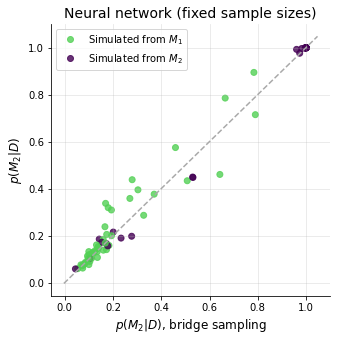

In [11]:
# PMPs
plot_approximations(bridge, NN_fixed, approximated_outcome=0, NN_name='Neural network (fixed sample sizes)', save=True)

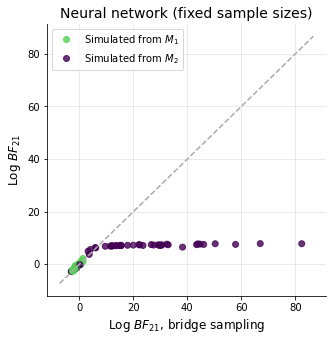

In [12]:
# Log BFs
plot_approximations(bridge, NN_fixed, approximated_outcome=1, NN_name='Neural network (fixed sample sizes)')

# of included datasets: 68


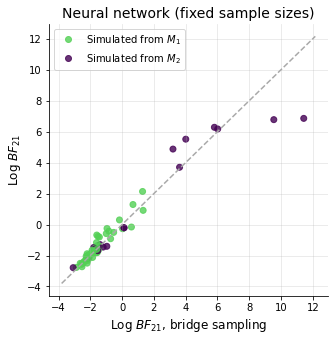

In [13]:
# Log Bfs with filter
filter = bridge['bayes_factor']<100000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_fixed_filtered = NN_fixed[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_fixed_filtered, approximated_outcome=1, NN_name='Neural network (fixed sample sizes)', save=True)

## BS vs variable NN

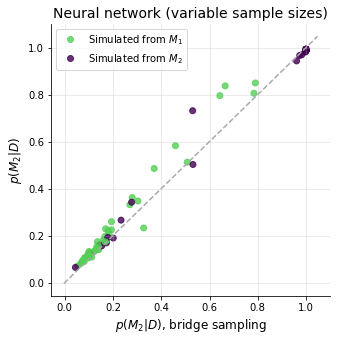

In [14]:
# PMPs
plot_approximations(bridge, NN_variable, approximated_outcome=0, NN_name='Neural network (variable sample sizes)', save=True)

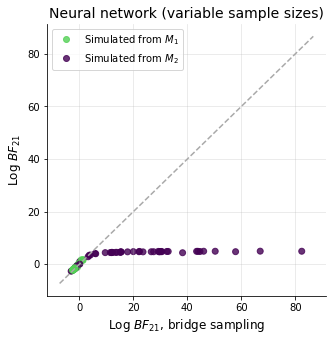

In [15]:
# Log BFs
plot_approximations(bridge, NN_variable, approximated_outcome=1, NN_name='Neural network (variable sample sizes)')

# of included datasets: 68


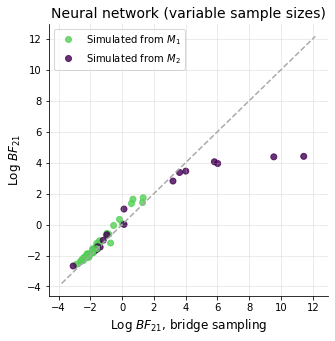

In [16]:
# Log Bfs with filter
filter = bridge['bayes_factor']<100000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_variable_filtered = NN_variable[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_variable_filtered, approximated_outcome=1, NN_name='Neural network (variable sample sizes)', save=True)

# Plot together for publication

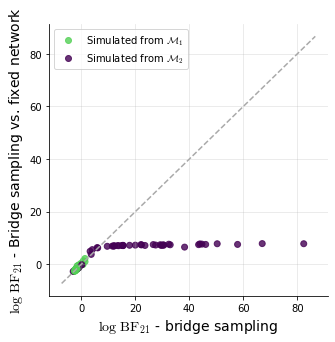

In [44]:
# hack for quick experimentation with plotting options

def plot_approximationsxx(bridge_sampling_results, NN_results, approximated_outcome, NN_name, 
                        figsize=(5, 5), colors = {0:'#53D055FF', 1:'#440154FF'}, save=False, ax=None):
    """Plots and contrasts the approximations generated by bridge sampling and a neural network.

    Parameters
    ----------
    bridge_sampling_results : pd.DataFrame
        Bridge sampling approximations
    NN_results : pd.DataFrame
        Neural network approximations
    approximated_outcome : boolean
        Indicates whether posterior model probabilities (0) or Log Bayes factors (1) shall be plotted
    NN_name : string
        Indicates the type of neural network (fixed/variable)
    """
    
    plt.rcParams.update({
    "text.usetex": False,
    #"font.family": "serif",
    "font.serif": ["Palatino"],
    'mathtext.fontset': 'cm'
    })

    if not ax:
        f, ax = plt.subplots(1, 1, figsize=figsize)

    if approximated_outcome == 0: # PMPs
        bridge_data = bridge_sampling_results['m1_prob']
        NN_data = NN_results['m1_prob']
        label_outcome = r'$p(\mathcal{M}_2\,|\,\it{x})$'
        
    elif approximated_outcome == 1: # Log BFs
        bridge_data = log_with_inf_noise_addition(bridge_sampling_results)
        NN_data = log_with_inf_noise_addition(NN_results)
        label_outcome = r'$\log \/ \mathrm{BF}_{21}$' #'$Log\/BF_{21}$'

    ax.scatter(bridge_data, NN_data, c=bridge_sampling_results['true_model'].map(colors), alpha=.8)
    helperlist = [plt.plot([], marker="o", ls="", color=color, alpha=.8)[0] for color in colors.values()] # hack for legend
    ax.legend(helperlist, [r'Simulated from $\mathcal{M}_1$', 'Simulated from $\mathcal{M}_2$'], loc='upper left')
    ax.plot(ax.get_xlim(), ax.get_xlim(), '--', color='darkgrey')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel(label_outcome + ' - ' + 'bridge sampling', fontsize=14)
    ax.set_ylabel(label_outcome + ' - ' + NN_name, fontsize=14)

    # Comment in if not using PMP/log BF suptitles variant
    #ax.set_ylabel(label_outcome + ' - ' + 'neural network', fontsize=14)
    #ax.set_title(NN_name, fontsize=16)
    ax.grid(alpha=.3)
    
    if save == True:
        if approximated_outcome == 0: 
            plt.savefig('BS_vs_NN_PMPs_.png', dpi=300, bbox_inches='tight')
        if approximated_outcome == 1: 
            plt.savefig('BS_vs_NN_BFs_.png', dpi=300, bbox_inches='tight')

plot_approximationsxx(bridge, NN_fixed, approximated_outcome=1, NN_name='Bridge sampling vs. fixed network')

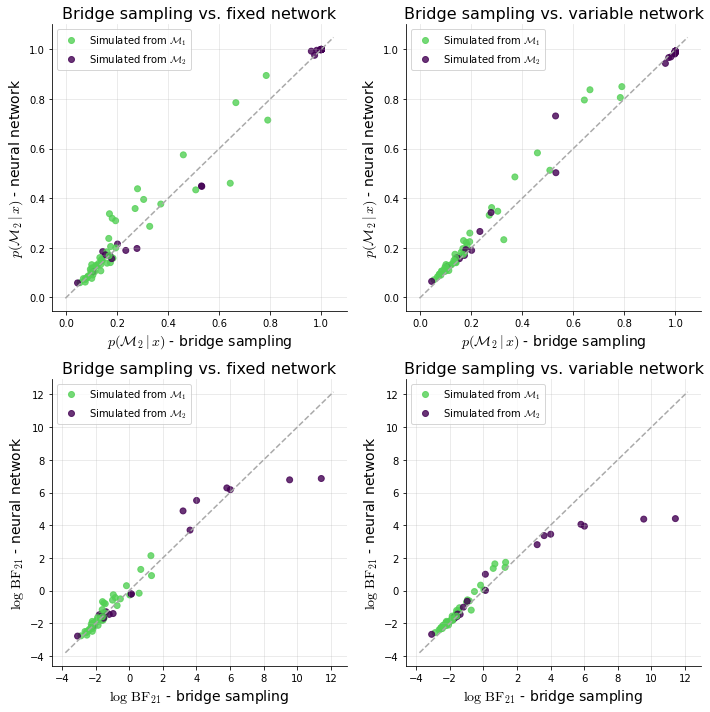

In [18]:
# Plot with seperate title for each figure

fig, axarr = plt.subplots(2, 2, figsize=(10, 10))

filter = bridge['bayes_factor']<100000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_fixed_filtered = NN_fixed[filter].reset_index(drop=True)
NN_variable_filtered = NN_variable[filter].reset_index(drop=True)

plot_approximationsxx(bridge, NN_fixed, approximated_outcome=0, NN_name='Bridge sampling vs. fixed network', ax=axarr[0, 0])
plot_approximationsxx(bridge, NN_variable, approximated_outcome=0, NN_name='Bridge sampling vs. variable network', ax=axarr[0, 1])
plot_approximationsxx(bridge_filtered, NN_fixed_filtered, approximated_outcome=1, NN_name='Bridge sampling vs. fixed network', ax=axarr[1, 0])
plot_approximationsxx(bridge_filtered, NN_variable_filtered, approximated_outcome=1, NN_name='Bridge sampling vs. variable network', ax=axarr[1, 1])

fig.tight_layout()
plt.savefig('bs_comparison_convergence.png', dpi=300, bbox_inches='tight')

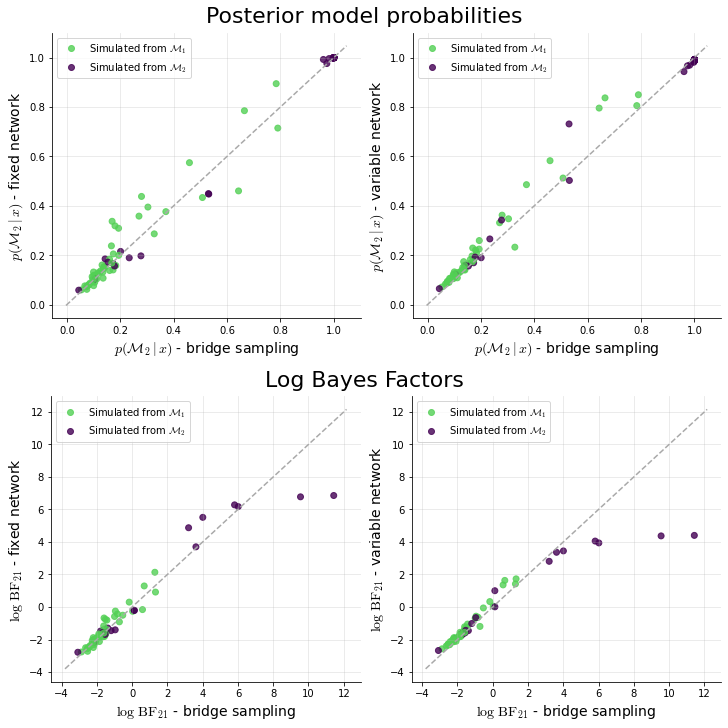

In [51]:
# Plot with PMP/log BF suptitles

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
subfigs = fig.subfigures(nrows=2, ncols=1)
subfigure_titles = ['Posterior model probabilities', 'Log Bayes Factors']

bridge_list = [bridge, bridge_filtered]
NN_fixed_list = [NN_fixed, NN_fixed_filtered]
NN_variable_list = [NN_variable, NN_variable_filtered]

# Use subfig to enable row titles
for row, subfig in enumerate(subfigs):
    subfig.suptitle(subfigure_titles[row], fontsize=22)

    # create 1x2 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2)

    plot_approximationsxx(bridge_list[row], NN_fixed_list[row], approximated_outcome=row, NN_name='fixed network', ax=axs[0])
    plot_approximationsxx(bridge_list[row], NN_variable_list[row], approximated_outcome=row, NN_name='variable network', ax=axs[1])

plt.savefig('bs_comparison_convergence.png', dpi=300, bbox_inches='tight')

# Plot computation time as function of datasets

In [52]:
# Calculate computation times
bridge_time, NN_fixed_time, NN_variable_time = computation_times(bridge, NN_fixed, NN_variable)

In [53]:
# Mean computation times per phase
# Bridge Sampling
print('Stan: {}'.format(np.mean(bridge['stan_time'])))
print('Bridge: {}'.format(np.mean(bridge['bridge_time'])))

# NN fixed
print('NN fixed training: {}'.format(np.mean(NN_fixed['training_time'])))
print('NN fixed inference: {}'.format(np.mean(NN_fixed['inference_time'])))

# NN variable
print('NN variable training: {}'.format(np.mean(NN_variable['training_time'])))
print('NN variable inference: {}'.format(np.mean(NN_variable['inference_time'])))

Stan: 42.850982012748716
Bridge: 29.34168642282486
NN fixed training: 722.9514567999998
NN fixed inference: 0.0006955440000001003
NN variable training: 2810.423959399999
NN variable inference: 0.0034660489999987004


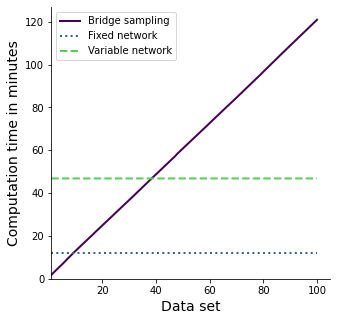

In [60]:
# Plot for all datasets
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(bridge_time, label='Bridge sampling', lw=2, color='#440154FF')
ax.plot(NN_fixed_time, label='Fixed network', lw=2, linestyle='dotted', color='#33638DFF')
ax.plot(NN_variable_time, label='Variable network', lw=2, linestyle='dashed', color='#53D055FF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Data set', fontsize=14) # add (cumulative)? 
ax.set_ylabel('Computation time in minutes', fontsize=14)
ax.set_xlim(xmin=1)
ax.set_ylim(ymin=0)
ax.legend(loc='upper left')
f.savefig('bs_comparison_comp_times.png', dpi=300, bbox_inches='tight')